### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)

Update to use numpy for faster loops based on comments [here](https://www.reddit.com/r/Python/comments/arxwkm/monte_carlo_simulation_with_python/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 100000

In [4]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)

In [5]:
pct_to_target[0:10]

array([[0.76548082, 1.04166532, 1.2184992 , ..., 1.00622055, 1.00637059,
        0.92626205],
       [1.01938928, 1.09808734, 0.69737035, ..., 1.08809924, 1.12135852,
        0.79680363],
       [1.12202993, 0.91529405, 1.08092153, ..., 1.04067033, 0.94273564,
        0.94284592],
       ...,
       [1.19301168, 1.04227242, 1.00116365, ..., 1.01501741, 0.82327658,
        1.12588962],
       [1.0327271 , 0.91275343, 1.05962165, ..., 1.08898112, 1.00555414,
        0.94630566],
       [0.96890211, 0.95823858, 0.95673937, ..., 1.17137324, 0.95037432,
        0.88637804]])

In [6]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, 
                                size=(num_reps, num_simulations))

In [7]:
sales_target[0:10]

array([[100000, 300000, 300000, ..., 300000, 100000, 100000],
       [ 75000, 100000, 200000, ..., 100000, 100000,  75000],
       [100000, 300000,  75000, ..., 200000,  75000,  75000],
       ...,
       [500000,  75000, 500000, ...,  75000, 200000, 400000],
       [100000,  75000,  75000, ..., 400000, 100000, 200000],
       [300000,  75000, 300000, ..., 400000, 200000, 200000]])

In [8]:
commission_percentages = np.take(
    np.array([0.02, 0.03, 0.04]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

In [9]:
commission_percentages[0:10]

array([[0.02, 0.04, 0.04, ..., 0.04, 0.04, 0.03],
       [0.04, 0.04, 0.02, ..., 0.04, 0.04, 0.02],
       [0.04, 0.03, 0.04, ..., 0.04, 0.03, 0.03],
       ...,
       [0.04, 0.04, 0.04, ..., 0.04, 0.02, 0.04],
       [0.04, 0.03, 0.04, ..., 0.04, 0.04, 0.03],
       [0.03, 0.03, 0.03, ..., 0.04, 0.03, 0.02]])

In [10]:
total_commissions = (commission_percentages * sales_target).sum(axis=0)

In [11]:
total_commissions.std()

96200.96685425566

In [12]:
# Show how to create the dataframe
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

,Total_Commissions
0,2803250.0
1,2727250.0
2,2684000.0
3,2830500.0
4,2796750.0


<AxesSubplot:title={'center':'Commissions Distribution'}, ylabel='Frequency'>

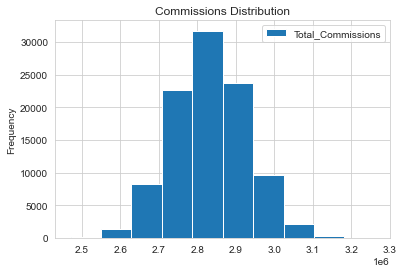

In [13]:
df.plot(kind='hist', title='Commissions Distribution')

In [14]:
df.describe()

,Total_Commissions
count,1.000000e+05
mean,2.831522e+06
std,9.620145e+04
min,2.470250e+06
25%,2.765750e+06
50%,2.830500e+06
75%,2.896250e+06
max,3.261250e+06
